# **SUPPORT VECTOR REGRESSION**

## **IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
test=pd.read_csv("/content/sample_data/california_housing_test.csv")
train=pd.read_csv("/content/sample_data/california_housing_train.csv")

In [ ]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
test.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0
2999,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0


In [ ]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   h

In [ ]:
n_train = train.shape[0]
n_test = test.shape[0]
y = train['median_house_value'].values
data = pd.concat((train, test)).reset_index(drop = True)
data.drop(['longitude','latitude'], axis=1, inplace = True)

## **DATA ANALYSIS**

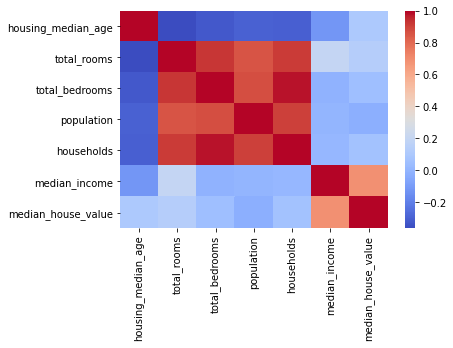

In [ ]:
plt.figure()
sns.heatmap(data.corr(), cmap='coolwarm')
plt.show()

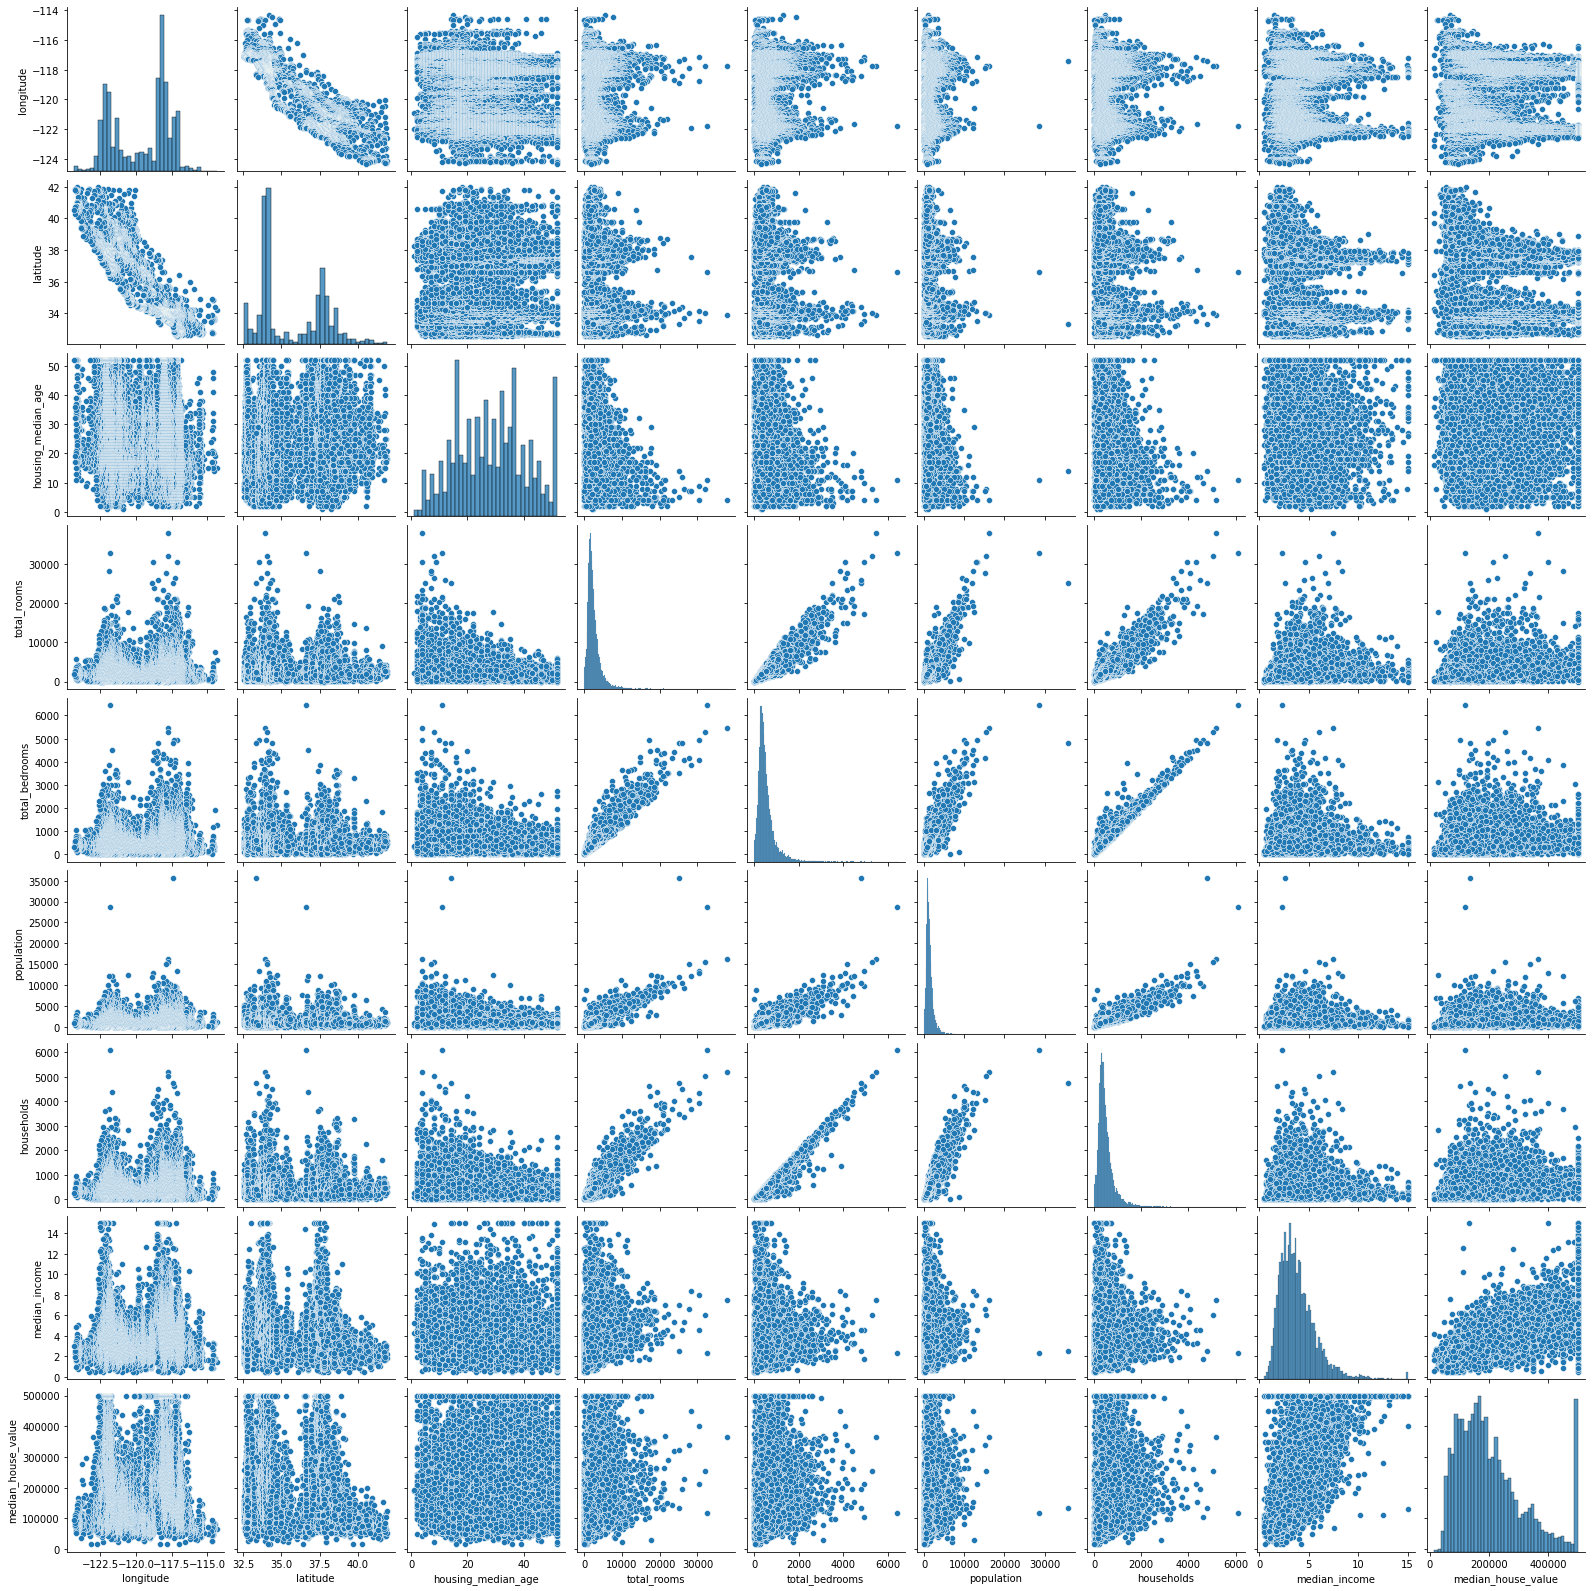

In [ ]:
sns.pairplot(train, palette='rainbow')

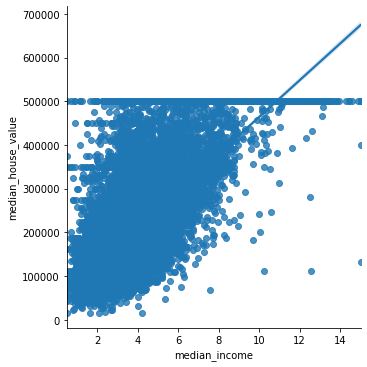

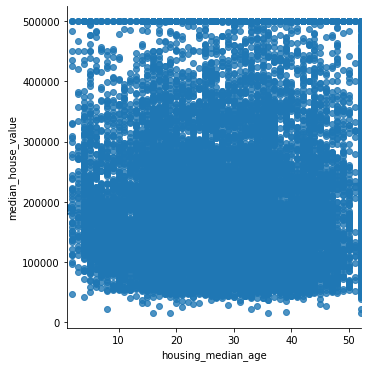

In [ ]:
sns.lmplot(x='median_income', y='median_house_value', data=train)
sns.lmplot(x='housing_median_age', y='median_house_value', data=train)

## **FEATURE ENGINEERING**

In [ ]:
data = data[['total_rooms', 'total_bedrooms', 'housing_median_age', 'median_income', 'population', 'households']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_rooms         20000 non-null  float64
 1   total_bedrooms      20000 non-null  float64
 2   housing_median_age  20000 non-null  float64
 3   median_income       20000 non-null  float64
 4   population          20000 non-null  float64
 5   households          20000 non-null  float64
dtypes: float64(6)
memory usage: 937.6 KB


In [ ]:
data['total_rooms'] = data['total_rooms'].fillna(data['total_rooms'].mean())
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())
data['housing_median_age'] = data['housing_median_age'].fillna(data['housing_median_age'].mean())
data['median_income'] = data['median_income'].fillna(data['median_income'].mean())
data['population'] = data['population'].fillna(data['population'].mean())
data['households'] = data['households'].fillna(data['households'].mean())

In [ ]:
train = data[:n_train]
test = data[n_train:]

## **FITTING THE MODEL**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.2)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([328531.93363257, 171378.64778064, 272247.37895393, ...,
       305649.28915829, 355803.78907789, 137777.94257771])

In [ ]:
df = pd.DataFrame({'Real Values':sc_y.inverse_transform(y_test.reshape(-1)), 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,416900.0,328531.933633
1,129500.0,171378.647781
2,291700.0,272247.378954
3,134300.0,97174.589354
4,284900.0,226832.583256
...,...,...
3395,118800.0,77395.744377
3396,273100.0,183712.818098
3397,268200.0,305649.289158
3398,376000.0,355803.789078
